# Neural Networks

## STRATEGIC MANAGEMENT AND PROJECT PERFORMANCE STUDY

In [1]:
#Study Topic
#INFLUENCE OF STRATEGIC MANAGEMENT ON PERFORMANCE OF HIV AND AIDS INTERVENTIONS MANAGED BY NON-GOVERNMENTAL ORGANISATIONS IN NYANZA REGION, KENYA

In [27]:
#The study was guided by the following objectives: 
#1. To examine the influence of organisations purpose on performance of HIV and AIDS interventions managed by non-governmental organisations in Nyanza Region. 
#2. To establish the influence of environmental scanning on performance of HIV and AIDS interventions managed by non-governmental organisations in Nyanza Region. 
#3. To determine the influence of strategy formulation on performance of HIV and AIDS interventions managed by non-governmental organisations in Nyanza Region. 
#4. To assess the influence of strategy implementation on performance of HIV and AIDS interventions managed by non-governmental organisations in Nyanza Region. 
#5. To establish the influence of strategy evaluation and control on performance of HIV and AIDS interventions managed by non-governmental organisations in Nyanza Region. 
#6. To examine the moderating influence of stakeholder participation on the relationship between strategic management and performance of HIV and AIDS interventions managed by NGOs in Nyanza Region. 

In [28]:
#importing libraries 
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

In [29]:
#importing the data 
df=pd.read_csv('Strategic_Management.csv')
X = df.iloc[:,0:6]
y = df.iloc[:,6]

In [30]:
#exploring the data 
df.head()

,OrganizationsPurpose,EnvironmentalScanning,StrategyFormulation,StrategyImplementation,StrategyEvaluation,StakeholderParticipation,Project_Perfomance
0,21,23,29,35,28,21,26
1,19,25,24,35,24,19,24
2,21,26,29,38,33,27,29
3,21,26,29,34,29,24,27
4,21,30,24,35,29,24,27


In [31]:
df.describe()

,OrganizationsPurpose,EnvironmentalScanning,StrategyFormulation,StrategyImplementation,StrategyEvaluation,StakeholderParticipation,Project_Perfomance
count,50.00000,50.000000,50.000000,50.000000,50.000000,50.00000,50.000000
mean,20.78000,26.640000,28.560000,35.060000,29.880000,23.18000,27.340000
std,0.70826,2.663127,1.960425,3.542223,3.185682,3.92111,2.016362
min,19.00000,21.000000,24.000000,27.000000,24.000000,15.00000,23.000000
25%,21.00000,25.000000,28.000000,33.000000,28.000000,21.00000,26.000000
50%,21.00000,26.000000,29.000000,35.000000,29.000000,24.00000,27.500000
75%,21.00000,29.000000,30.000000,38.750000,32.000000,26.00000,29.000000
max,22.00000,30.000000,30.000000,40.000000,35.000000,30.00000,30.000000


In [32]:
df.corr()

,OrganizationsPurpose,EnvironmentalScanning,StrategyFormulation,StrategyImplementation,StrategyEvaluation,StakeholderParticipation,Project_Perfomance
OrganizationsPurpose,1.000000,0.465684,0.413898,0.363290,0.566941,0.499555,0.639350
EnvironmentalScanning,0.465684,1.000000,0.340393,0.595107,0.511992,0.414792,0.722556
StrategyFormulation,0.413898,0.340393,1.000000,0.359480,0.582839,0.188390,0.611689
StrategyImplementation,0.363290,0.595107,0.359480,1.000000,0.512465,0.563429,0.837139
StrategyEvaluation,0.566941,0.511992,0.582839,0.512465,1.000000,0.255000,0.768989
StakeholderParticipation,0.499555,0.414792,0.188390,0.563429,0.255000,1.000000,0.707102
Project_Perfomance,0.639350,0.722556,0.611689,0.837139,0.768989,0.707102,1.000000


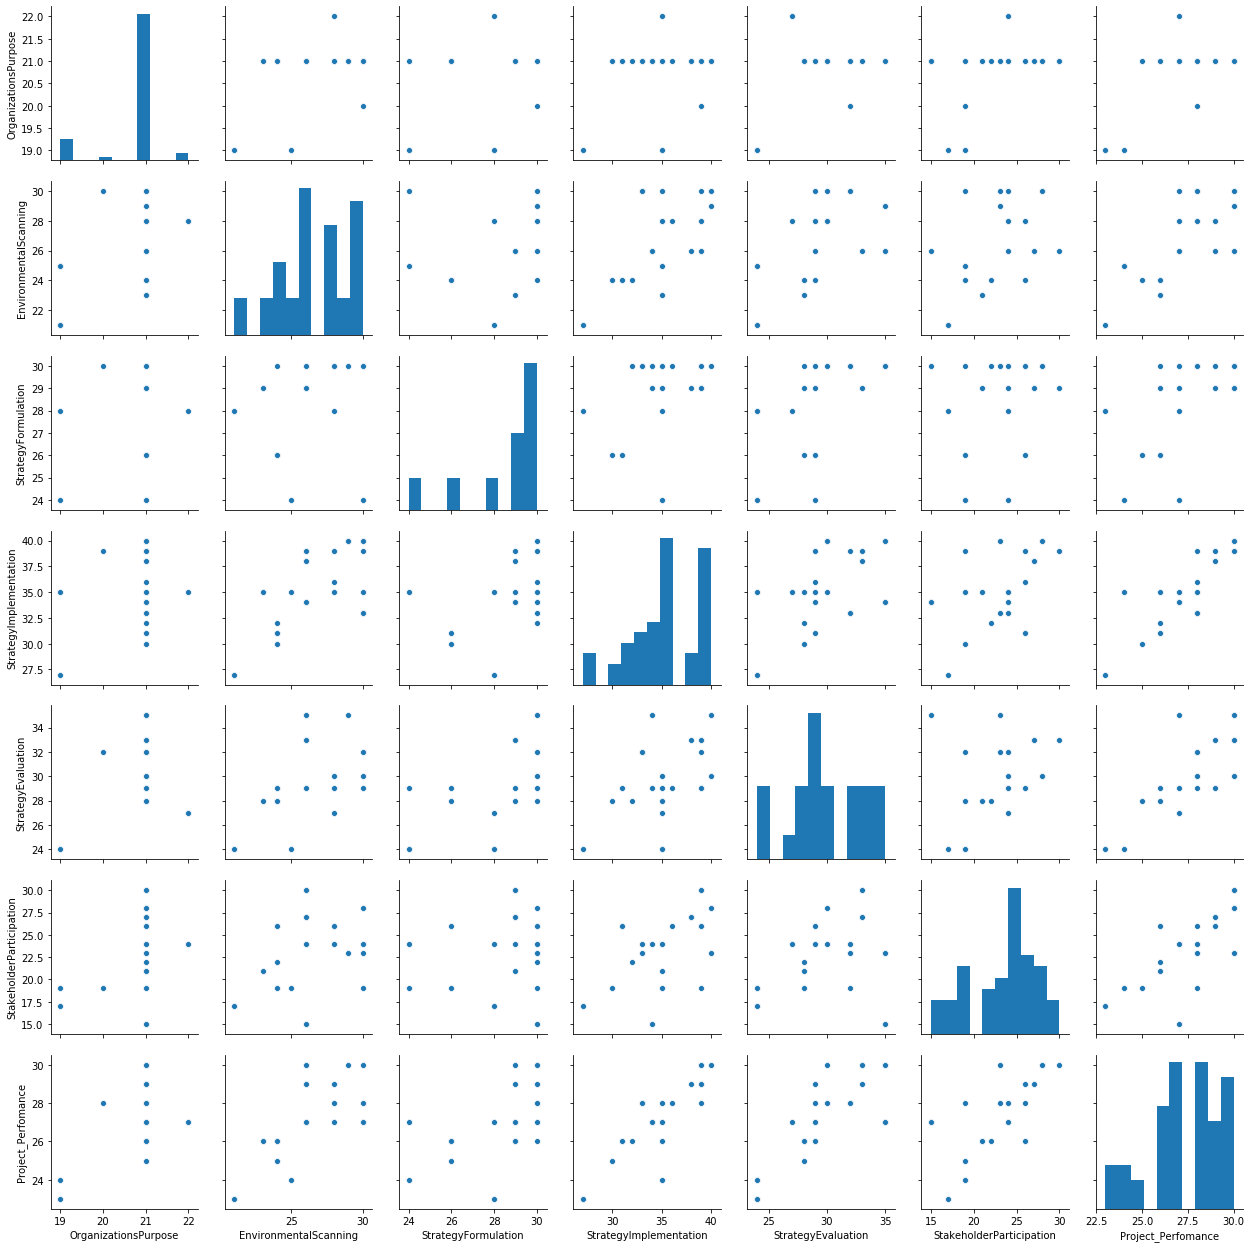

In [33]:
sns.pairplot(df)

In [34]:
#Train/Test Split
from sklearn.model_selection import train_test_split

In [35]:
# Convert Pandas to Numpy for Keras

# Features
X = df[['OrganizationsPurpose','EnvironmentalScanning','StrategyFormulation','StrategyImplementation','StrategyEvaluation','StakeholderParticipation']].values

# Label
y = df ['StakeholderParticipation'].values

# Split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=42)

In [36]:
#Confirming the X_train shape
X_train.shape

(35, 6)

In [37]:
#Confirming the y_train shape
y_train.shape

(35,)

In [38]:
#Confirming the X_test shape
X_test.shape

(15, 6)

In [39]:
#Confirming the y_test shape
y_test.shape

(15,)

In [40]:
#Normalizing/Scaling data
from sklearn.preprocessing import MinMaxScaler

In [41]:
#Checking the documentation for the Scaler
#help(MinMaxScaler)

In [79]:
# To prevent data leakage from the test set, we only fit our scaler to the training set
scaler = MinMaxScaler()
scaler.fit(X_train)

MinMaxScaler()

In [80]:
#importing TF libraries
import tensorflow as tf
from tensorflow.keras.models import Sequential 

In [81]:
#checking the sequential documentation 
#help(Sequential)

In [82]:
#Creating the model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation

In [83]:
#Adding the layers
model = Sequential()

model.add(Dense(3))
model.add(Dense(3))
model.add(Dense(3))

In [84]:
model = Sequential()

model.add(Dense(4,activation='relu'))
model.add(Dense(4,activation='relu'))
model.add(Dense(4,activation='relu'))

# Final output node for prediction
model.add(Dense(1))

model.compile(optimizer='rmsprop',loss='mse')

In [85]:
X_train = X_train/256
y_train = y_train/256

In [86]:
#training the model
model.fit(X_train,y_train,epochs=100)

Train on 35 samples
Epoch 1/100
35/35 [==============================] - 0s 12ms/sample - loss: 1.4181e-05
Epoch 2/100
35/35 [==============================] - 0s 258us/sample - loss: 1.4954e-08
Epoch 3/100
35/35 [==============================] - 0s 182us/sample - loss: 4.1116e-09
Epoch 4/100
35/35 [==============================] - 0s 213us/sample - loss: 2.6528e-09
Epoch 5/100
35/35 [==============================] - 0s 359us/sample - loss: 2.9238e-09
Epoch 6/100
35/35 [==============================] - 0s 281us/sample - loss: 2.4543e-09
Epoch 7/100
35/35 [==============================] - 0s 630us/sample - loss: 1.0018e-08
Epoch 8/100
35/35 [==============================] - 0s 351us/sample - loss: 2.5255e-09
Epoch 9/100
35/35 [==============================] - 0s 501us/sample - loss: 2.1937e-09
Epoch 10/100
35/35 [==============================] - 0s 265us/sample - loss: 1.4631e-08
Epoch 11/100
35/35 [==============================] - 0s 186us/sample - loss: 9.1165e-08
Epoch 12/10

Epoch 93/100
35/35 [==============================] - 0s 272us/sample - loss: 1.7853e-07
Epoch 94/100
35/35 [==============================] - 0s 187us/sample - loss: 2.1622e-07
Epoch 95/100
35/35 [==============================] - 0s 174us/sample - loss: 3.4772e-07
Epoch 96/100
35/35 [==============================] - 0s 194us/sample - loss: 2.8960e-07
Epoch 97/100
35/35 [==============================] - 0s 326us/sample - loss: 3.2181e-07
Epoch 98/100
35/35 [==============================] - 0s 311us/sample - loss: 3.1357e-07
Epoch 99/100
35/35 [==============================] - 0s 304us/sample - loss: 2.3686e-07
Epoch 100/100
35/35 [==============================] - 0s 209us/sample - loss: 1.9881e-07


In [87]:
#Performance Evaluation
model.history.history

{'loss': [1.4180535598435589e-05,
  1.4954372451470022e-08,
  4.1116179651444285e-09,
  2.652847846158173e-09,
  2.9237917357046887e-09,
  2.4542952178511054e-09,
  1.0017581481796307e-08,
  2.525465952236366e-09,
  2.193653614313007e-09,
  1.4630749995652488e-08,
  9.11652486073373e-08,
  6.894586813846867e-08,
  6.780427508346065e-09,
  5.531741084244653e-09,
  3.503368401729696e-09,
  3.4392158644789917e-09,
  3.3046934141570514e-09,
  3.811421591036281e-09,
  3.2821634299295965e-09,
  3.608502277937678e-09,
  3.969154884129823e-09,
  7.113166030795323e-09,
  3.863584119301322e-09,
  3.861894210136338e-08,
  2.9088282807216663e-07,
  9.354579609472629e-07,
  3.6418194123858226e-07,
  1.1591492535347113e-07,
  9.418472533947612e-08,
  8.506124170740544e-08,
  1.5773972401283182e-07,
  4.300692272149068e-07,
  7.079852959382801e-07,
  2.106945848774038e-07,
  9.991431641408001e-08,
  7.170010454566571e-08,
  5.7225985626376184e-08,
  7.44406713287e-08,
  2.4155174125033747e-07,
  7.68

In [88]:
loss = model.history.history['loss']

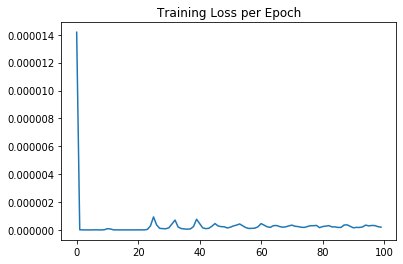

In [89]:
sns.lineplot(x=range(len(loss)),y=loss)
plt.title("Training Loss per Epoch");

In [90]:
#Compare final evaluation (MSE) on training set and test set.
model.metrics_names

['loss']

In [91]:
training_score = model.evaluate(X_train,y_train,verbose=0)
test_score = model.evaluate(X_test,y_test,verbose=0)

In [92]:
training_score

2.684187498808959e-07

In [93]:
test_score

187.91880798339844

In [94]:
#Further Evaluation
test_predictions = model.predict(X_test)

In [95]:
test_predictions

array([[10.270649 ],
       [11.531342 ],
       [11.442065 ],
       [10.295171 ],
       [10.788583 ],
       [10.730273 ],
       [11.565593 ],
       [11.531342 ],
       [11.285148 ],
       [ 9.3151865],
       [11.024768 ],
       [ 9.914904 ],
       [11.287818 ],
       [10.081335 ],
       [10.655435 ]], dtype=float32)

In [96]:
pred_df= pd.DataFrame(y_test,columns=['Test Y'])

In [97]:
pred_df

,Test Y
0,15
1,28
2,26
3,23
4,19
5,24
6,30
7,28
8,23
9,17


In [98]:
test_predictions = pd.Series(test_predictions.reshape(15,))

In [99]:
test_predictions

0     10.270649
1     11.531342
2     11.442065
3     10.295171
4     10.788583
5     10.730273
6     11.565593
7     11.531342
8     11.285148
9      9.315187
10    11.024768
11     9.914904
12    11.287818
13    10.081335
14    10.655435
dtype: float32

In [100]:
pred_df = pd.concat([pred_df,test_predictions],axis=1)

In [101]:
pred_df.columns = ['Test Y','Model Predictions']

In [102]:
pred_df

,Test Y,Model Predictions
0,15,10.270649
1,28,11.531342
2,26,11.442065
3,23,10.295171
4,19,10.788583
5,24,10.730273
6,30,11.565593
7,28,11.531342
8,23,11.285148
9,17,9.315187


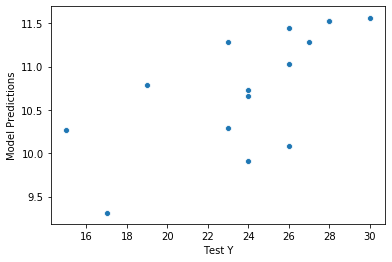

In [103]:
#Visualizing the predictions against the actual values in the test data
sns.scatterplot(x='Test Y',y='Model Predictions',data=pred_df)

In [104]:
pred_df['Error'] = pred_df['Test Y'] - pred_df['Model Predictions']

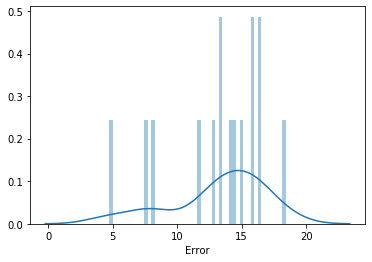

In [105]:
sns.distplot(pred_df['Error'],bins=50)

In [106]:
from sklearn.metrics import mean_absolute_error,mean_squared_error

In [107]:
mean_absolute_error(pred_df['Test Y'],pred_df['Model Predictions'])

13.21869265238444

In [108]:
mean_squared_error(pred_df['Test Y'],pred_df['Model Predictions'])

187.91882317078478

In [109]:
# Essentially the same thing, difference just due to precision
test_score

187.91880798339844

In [110]:
#RMSE
test_score**0.5

13.708348112861682

In [111]:
#Predicting Brand New Data

#['OrganizationsPurpose','EnvironmentalScanning','StrategyFormulation','StrategyImplementation','StrategyEvaluation','StakeholderParticipation']]

New_organization=[[40,35,40,45,39,25]]

In [112]:
#Scaling the data
scaler.transform(New_organization)

array([[3407.        ,  993.22222222, 1702.66666667,  884.07692308,
         905.45454545,  425.66666667]])

In [113]:
New_organization = scaler.transform(New_organization)

In [114]:
model.predict(New_organization)

array([[813.0184]], dtype=float32)

In [115]:
#saving the model and loading a model
from tensorflow.keras.models import load_model

In [116]:
#This creates a HDF file 
model.save('Strategy_Model.h5')

In [117]:
later_model = load_model('Strategy_Model.h5')

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


In [118]:
later_model.predict(New_organization)

array([[813.0184]], dtype=float32)

In [119]:
int(later_model.predict(New_organization))

813

In [ ]:
#Conclusion:
#This model wasn't a great one,neural networks do well with a lot more data.